In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cantonioupao/oxford-flower-17categories-labelled")

print("Path to dataset files:", path)

from tensorflow.keras.utils import image_dataset_from_directory

data =  image_dataset_from_directory(
    path + '/17FlowerOxfordDataset',
)

100%|██████████| 57.8M/57.8M [00:00<00:00, 64.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/cantonioupao/oxford-flower-17categories-labelled/versions/1
Found 1360 files belonging to 15 classes.


In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [3]:
model = Sequential([
    Conv2D(25, (3,3), activation='relu', input_shape=(256,256,3)),
    MaxPool2D(2,2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(15, activation='softmax')
])

model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
images = []
labels = []

for image_batch, label_batch in data:
    images.extend(image_batch.numpy())
    labels.extend(label_batch.numpy())

labels[:5]

[np.int32(12), np.int32(8), np.int32(10), np.int32(11), np.int32(6)]

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    images,labels
)

In [6]:

model.fit(np.array(X_train), np.array(y_train))

32/32 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.0811 - loss: 3417.1562


#### SHAP Code for Image starts here


In [17]:
np.array(X_train).shape

(1020, 256, 256, 3)

In [25]:
import numpy as np

# Convert X_train to a NumPy array
X_train_np = np.array(X_train)

# Now you can index using a NumPy array
selected_images = X_train_np[np.random.choice(X_train_np.shape[0], 5, replace=False)]

In [36]:
import tensorflow as tf

In [39]:
import shap

explainer = shap.DeepExplainer(model, tf.convert_to_tensor(selected_images))


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(5, 256, 256, 3))']
  warnings.warn(msg)


In [28]:
shap_values = explainer.shap_values(np.array(X_test[:3]))

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(10, 256, 256, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(3, 256, 256, 3))']
  warnings.warn(msg)


In [34]:
shap_values

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ...

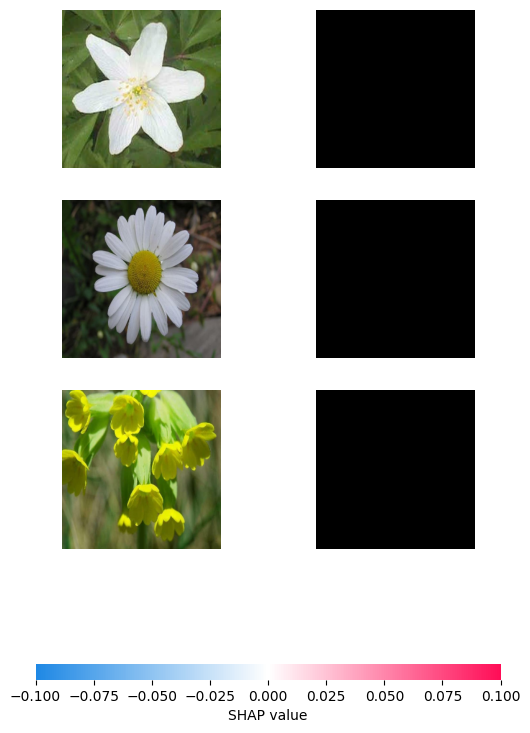

In [33]:
shap.image_plot(shap_values,np.array(X_test[:3]) /  np.max(np.array(X_test[:3])))

# SHAP on tabular

In [1]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [2]:
import shap

In [3]:
explainer = shap.TreeExplainer(model, X_train)

In [ ]:
preds = explainer.shap_values(X_test)

 27%|=====               | 4861/17711 [01:47<04:42]       

In [ ]:
shap.summary_plot(preds, X_test)